In [68]:
## Importing the necessary libraries and loading the songs train data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
songs = pd.read_csv('../data/spotify_songs_train.csv')

In [69]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


<Figure size 1000x600 with 0 Axes>

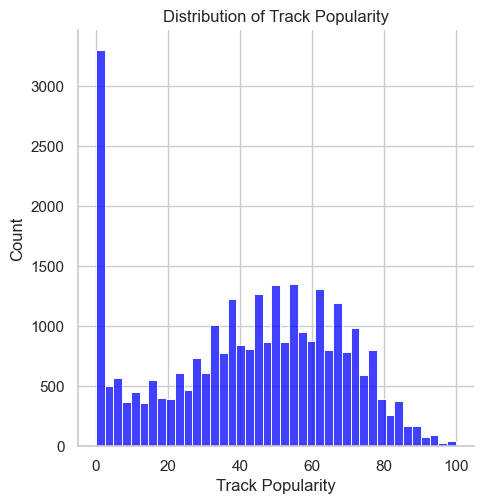

In [70]:
## Plotting the distribution of the target variable i.e track_popularity
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.displot(songs['track_popularity'], kde=False, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.show()

There are a lot of songs with popularity 0, we can drop these columns but let's keep them intact to teach our model that the score can be 0 as well, means these songs got not traction at all

In [71]:
# ## Dropping the rows with popularity equal to 0
# songs = songs[songs['track_popularity'] != 0]

# ## Plotting the distribution of the target variable i.e track_popularity
# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.displot(songs['track_popularity'], kde=False, color='blue')
# plt.title('Distribution of Track Popularity')
# plt.xlabel('Track Popularity')
# plt.ylabel('Count')
# plt.show()

In [72]:
## Checking for missing values
songs.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [73]:
## Dropping the missing values
songs = songs.dropna()
## Checking the shape of the updated data
songs.shape

(29545, 23)

## Feature Engineering

In [76]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,num_playlists,num_albums
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,1,1
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1,1


### Now we observed that tracks are being repeated in the dataset, as on track can be part of multiple playlists, so we wiil only keep the row with the highest popularity for each track


In [77]:
songs = songs.sort_values('track_popularity', ascending=False).drop_duplicates('track_id').sort_index()
songs.shape

(25827, 25)

In [78]:
## Fetching the Month and Day from the release_date
songs['track_album_release_date'] = pd.to_datetime(songs['track_album_release_date'])
songs['release_month'] = songs['track_album_release_date'].dt.month
songs['release_day'] = songs['track_album_release_date'].dt.day

In [79]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,num_playlists,num_albums,release_month,release_day
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.000000,0.0653,0.518,122.036,194754,1,1,6,14
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0794,0.000023,0.1100,0.613,124.008,176616,2,1,7,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0287,0.000009,0.2040,0.277,121.956,169093,1,1,7,19
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0803,0.000000,0.0833,0.725,123.976,189052,1,1,3,5
6,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0335,0.000005,0.1110,0.367,127.936,207619,2,1,8,29


In [80]:
## Converting the release_month and release_day to categorical variables bucketing the months into seasons and the days into first10, mid 10 and last 10 days of the month
songs['release_month_category'] = songs['release_month'].map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
songs['release_day_category'] = songs['release_day'].apply(lambda x: 'First10' if x <= 10 else ('Mid10' if x <= 20 else 'Last10'))

In [81]:
## Using athe release dates to get the weekdays and weekends and then creating a binary variable for is weekend yes or no
songs['release_weekday'] = songs['track_album_release_date'].dt.dayofweek
songs['is_weekend'] = songs['release_weekday'].apply(lambda x: 1 if x > 4 else 0)

## Now we can drop the release weekday,release day and release month
songs = songs.drop('release_month', axis=1)
songs = songs.drop('release_weekday', axis=1)
songs = songs.drop('release_day', axis=1)

In [82]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,instrumentalness,liveness,valence,tempo,duration_ms,num_playlists,num_albums,release_month_category,release_day_category,is_weekend
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.000000,0.0653,0.518,122.036,194754,1,1,Summer,Mid10,0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.000023,0.1100,0.613,124.008,176616,2,1,Summer,First10,0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.000009,0.2040,0.277,121.956,169093,1,1,Summer,Mid10,0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.000000,0.0833,0.725,123.976,189052,1,1,Spring,First10,0
6,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.000005,0.1110,0.367,127.936,207619,2,1,Summer,Last10,0


### Getting the top 25 artists based on their average popularity scores and number of tracks in the past decade

In [83]:
songs['release_year'] = songs['track_album_release_date'].dt.year
songs_last_decade = songs[songs['release_year'] >= (songs['release_year'].max() - 10)]
top_artists = songs_last_decade.groupby('track_artist').agg({'track_popularity':'mean', 'track_id':'count'}).rename(columns={'track_popularity':'average_popularity', 'track_id':'number_of_tracks'})
top_artists = top_artists[top_artists['number_of_tracks'] >= 5] # Filter artists with at least 5 tracks
top_artists = top_artists.sort_values(['average_popularity', 'number_of_tracks'], ascending=[False, False]).head(25)
top_artists

,average_popularity,number_of_tracks
track_artist,,
DaBaby,83.666667,6
Roddy Ricch,83.428571,7
Harry Styles,81.777778,9
YNW Melly,81.571429,7
Jonas Brothers,78.000000,5
Twenty One Pilots,77.666667,6
Billie Eilish,77.260870,23
Lewis Capaldi,76.888889,9
Alec Benjamin,76.833333,6


### Now we create a binary feature that is 1 if artist is in the top 25 artists and 0 otherwise


In [84]:
# top_artists_list = top_artists.index.tolist()
# songs['is_top_artist'] = songs['track_artist'].apply(lambda x: 1 if x in top_artists_list else 0)

# songs.head()

### Getting the influence of subgenres on the popularity of the track

In [85]:
# Get the top 20 tracks of each subgenre in the last decade based on their popularity score
top_tracks_subgenre = songs_last_decade.groupby('playlist_subgenre')['track_popularity'].nlargest(20)

# Calculate the average popularity of these top 20 tracks for each subgenre
moonshot_subgenres = top_tracks_subgenre.groupby('playlist_subgenre').mean().rename('average_popularity')

# Sort the subgenres based on this average popularity
moonshot_subgenres = moonshot_subgenres.sort_values(ascending=False)

# Print the result as a DataFrame for better visualization
moonshot_subgenres_df = pd.DataFrame(moonshot_subgenres)
moonshot_subgenres_df

,average_popularity
playlist_subgenre,
post-teen pop,90.60
latin hip hop,90.30
hip pop,88.85
latin pop,87.95
urban contemporary,87.55
pop edm,87.00
trap,86.45
dance pop,85.15
hip hop,84.75


### We can observe that there is a distinct difference between the ratings of the subgenres, so we can create a binary variable for the top 10 subgenres

In [63]:
# top_subgenres = moonshot_subgenres_df.head(10).index.tolist()
# songs['is_top_subgenre'] = songs['playlist_subgenre'].apply(lambda x: 1 if x in top_subgenres else 0)

In [86]:
# ### Now we look for subgenres that have the least popularity tracks
# bottom3_subgenres = moonshot_subgenres_df.tail(3).index.tolist()
# songs['is_bottom3_subgenre'] = songs['playlist_subgenre'].apply(lambda x: 1 if x in bottom3_subgenres else 0)


In [87]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,liveness,valence,tempo,duration_ms,num_playlists,num_albums,release_month_category,release_day_category,is_weekend,release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0653,0.518,122.036,194754,1,1,Summer,Mid10,0,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1100,0.613,124.008,176616,2,1,Summer,First10,0,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.2040,0.277,121.956,169093,1,1,Summer,Mid10,0,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0833,0.725,123.976,189052,1,1,Spring,First10,0,2019
6,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1110,0.367,127.936,207619,2,1,Summer,Last10,0,2019


### Checking the number of trakcs that are a remix, essentially contain the word remix in the track name

In [88]:
songs['is_remix'] = songs['track_name'].apply(lambda x: 1 if 'remix' in x.lower() else 0)
songs['is_remix'].value_counts()

0    24190
1     1637
Name: is_remix, dtype: int64

In [92]:
## Dropping all the text columns
songs = songs.drop(['track_id', 'track_name', 'track_artist', 'track_album_id','track_album_name','track_album_release_date','playlist_id', 'playlist_name', 'track_album_release_date','release_year'], axis=1)
songs.columns

Index(['track_popularity', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'num_playlists', 'num_albums', 'release_month_category',
       'release_day_category', 'is_weekend', 'is_remix'],
      dtype='object')

In [93]:
categorical_features = ['playlist_genre', 'playlist_subgenre', 'key', 'mode', 'release_month_category', 'release_day_category', 'is_weekend', 'is_remix']
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'num_playlists', 'num_albums']